##  MARKING GUIDE ASSIGNMENT 1: CASSAVA YIELD DATA ##

You have been provided with an excel book on Cassava Yield Data.


**1.Explore the dataset showing the distribution of all the variables (“Sesn” to "TotalTuberperHectare"). Further explore the variables for missing information and outliers. Go ahead and transform the dataset to handle missing information and outliers.** (5 MARKS)

In [3]:
#Import necessary libraries
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset
import pandas as pd
import numpy as np

In [4]:
# Import the dataset and call it a dataframe "Cassava"
Cassava=pd.read_excel("Cassava_Yield_Data.xlsx")
#View the top ten rows of the dataframe
Cassava.head(10)

,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
0,2,1,1,1,conv,F2150,28,0,0.0,61,2.5,319,4.7,380,13.571429,7.2,5.3,10000,13584.905660,716981.132075
1,2,1,1,1,conv,F1100,28,0,0.0,110,4.6,260,4.0,370,13.214286,8.6,5.3,10000,16226.415094,698113.207547
2,2,1,1,1,conv,F3200,28,2,0.2,115,5.2,319,4.4,436,15.571429,9.8,5.3,10000,18490.566038,822641.509434
3,2,1,1,1,conv,F5300,28,6,0.7,60,2.7,303,4.8,369,13.178571,8.2,5.3,10000,15471.698113,696226.415094
4,2,1,1,1,conv,F4250,28,3,0.3,82,3.4,332,4.7,417,14.892857,8.4,5.3,10000,15849.056604,786792.452830
5,2,1,2,2,conv,F5300,28,6,0.5,65,2.7,299,4.5,370,13.214286,7.7,5.3,10000,14528.301887,698113.207547
6,2,1,2,2,conv,F3200,28,0,0.0,91,3.9,289,4.8,380,13.571429,8.7,5.3,10000,16415.094340,716981.132075
7,2,1,2,2,conv,F4250,28,0,0.0,72,3.5,246,4.6,318,11.357143,8.1,5.3,10000,15283.018868,600000.000000
8,2,1,2,2,conv,F1100,28,1,0.2,64,2.6,305,5.4,370,13.214286,8.2,5.3,10000,15471.698113,698113.207547
9,2,1,2,2,conv,F2150,28,1,0.1,56,2.5,308,4.5,365,13.035714,7.1,5.3,10000,13396.226415,688679.245283


In [34]:
#Main information of the dataset (data types)
Cassava.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sesn                   115 non-null    int64  
 1   locn                   115 non-null    int64  
 2   block                  115 non-null    int64  
 3   rep                    115 non-null    int64  
 4   tillage                115 non-null    object 
 5   ferT                   115 non-null    object 
 6   Plants_harvested       115 non-null    int64  
 7   No_bigtubers           115 non-null    int64  
 8   Weigh_bigtubers        115 non-null    float64
 9   No_mediumtubers        115 non-null    int64  
 10  Weight_mediumtubers    115 non-null    float64
 11  No_smalltubers         115 non-null    int64  
 12  Weight_smalltubers     115 non-null    float64
 13  Totaltuberno           115 non-null    int64  
 14  AV_tubers_Plant        115 non-null    float64
 15  Total_

In [6]:
#Checking for unique value counts in each variable
for col in Cassava:
    print(f"{col:22} has {Cassava[col].nunique():7} unique value")

Sesn                   has       2 unique value
locn                   has       2 unique value
block                  has       3 unique value
rep                    has       3 unique value
tillage                has       2 unique value
ferT                   has       5 unique value
Plants_harvested       has      16 unique value
No_bigtubers           has      20 unique value
Weigh_bigtubers        has      21 unique value
No_mediumtubers        has      75 unique value
Weight_mediumtubers    has      49 unique value
No_smalltubers         has      89 unique value
Weight_smalltubers     has      40 unique value
Totaltuberno           has      94 unique value
AV_tubers_Plant        has     111 unique value
Total_tubweight        has      70 unique value
plotsize               has       2 unique value
HEC                    has       1 unique value
TotalWeightperhectare  has      80 unique value
TotalTuberperHectare   has      95 unique value


In [7]:
Cassava.columns

Index(['Sesn', 'locn', 'block', 'rep', 'tillage ', 'ferT', 'Plants_harvested',
       'No_bigtubers', 'Weigh_bigtubers', 'No_mediumtubers',
       'Weight_mediumtubers', 'No_smalltubers', 'Weight_smalltubers',
       'Totaltuberno', 'AV_tubers_Plant', 'Total_tubweight', 'plotsize', 'HEC',
       'TotalWeightperhectare', 'TotalTuberperHectare'],
      dtype='object')

In [9]:
# Identify variables by their data types
categorical_columns = []
continuous_columns = []

for column in Cassava.columns:
    if Cassava[column].dtype == object or len(Cassava[column].unique()) <= 7:
        categorical_columns.append(column)
    else:
        continuous_columns.append(column)

# Display the categorization
print("Categorical Columns:")
print(categorical_columns)
print("\nContinuous Columns:")
print(continuous_columns)

Categorical Columns:
['Sesn', 'locn', 'block', 'rep', 'tillage ', 'ferT', 'plotsize', 'HEC']

Continuous Columns:
['Plants_harvested', 'No_bigtubers', 'Weigh_bigtubers', 'No_mediumtubers', 'Weight_mediumtubers', 'No_smalltubers', 'Weight_smalltubers', 'Totaltuberno', 'AV_tubers_Plant', 'Total_tubweight', 'TotalWeightperhectare', 'TotalTuberperHectare']


The dataset has 115 observations and 20 variables (8 floats, 10 integers, 2 objects)

Based on the unique counts, there are 8 categorical variables (Sesn, locn, block, rep, tillage, ferT, plotsize, HEC).

There 12 continuous variables (Plants_harvested, No_bigtubers, Weigh_bigtubers, No_mediumtubers, Weight_mediumtubers, No_smalltubers, Weight_smalltubers, Totaltuberno, AV_tubers_Plant, Total_tubweight).

There is no missing data

In [35]:
#Generate descriptive stats of the dataframe
Cassava.describe()

,Sesn,locn,block,rep,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0,115.000000,115.000000
mean,1.521739,1.521739,2.043478,2.043478,18.565217,4.000000,0.614783,49.521739,2.771304,146.252174,2.511304,199.773913,10.525355,5.897391,4.486957,10000.0,13094.339623,431822.336810
std,0.501713,0.501713,0.809931,0.809931,6.442908,7.367544,1.174678,29.920757,1.774911,87.351663,1.303354,102.555168,3.248495,3.040702,0.485134,0.0,6896.716668,184839.313619
min,1.000000,1.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.500000,57.000000,3.800000,1.000000,4.200000,10000.0,2380.952381,135714.285714
25%,1.000000,1.000000,1.000000,1.000000,14.000000,0.000000,0.000000,26.500000,1.300000,84.000000,1.500000,115.500000,8.027778,3.400000,4.200000,10000.0,8095.238095,275000.000000
50%,2.000000,2.000000,2.000000,2.000000,18.000000,0.000000,0.000000,44.000000,2.500000,109.000000,2.100000,179.000000,10.666667,6.000000,4.200000,10000.0,11904.761905,419047.619048
75%,2.000000,2.000000,3.000000,3.000000,28.000000,5.500000,0.700000,65.500000,3.950000,221.000000,3.600000,273.500000,12.973684,8.150000,5.300000,10000.0,16421.832884,589285.714286
max,2.000000,2.000000,3.000000,3.000000,28.000000,41.000000,7.000000,126.000000,8.100000,376.000000,5.400000,443.000000,19.200000,14.100000,5.300000,10000.0,33571.428571,835849.056604


In [14]:
#Also get the descriptive stats of the categorical variables
Cassava.describe(include=object)

,tillage,ferT
count,115,115
unique,2,5
top,conv,F2150
freq,60,23


Based on the descriptive statistics, there are some odd variables that show non-gaussian distribution

1. No_bigtubers has a min, median of zero which is impossible. Needs transformation

2. Weigh_bigtubers: similar situation

3. No_mediumtubers has a min of zero which is also impossible

4. Weight_mediumtubers: similar situation to above

In [37]:
#Check for missing data
Cassava.isna().sum()

Sesn                     0
locn                     0
block                    0
rep                      0
tillage                  0
ferT                     0
Plants_harvested         0
No_bigtubers             0
Weigh_bigtubers          0
No_mediumtubers          0
Weight_mediumtubers      0
No_smalltubers           0
Weight_smalltubers       0
Totaltuberno             0
AV_tubers_Plant          0
Total_tubweight          0
plotsize                 0
HEC                      0
TotalWeightperhectare    0
TotalTuberperHectare     0
dtype: int64

There's no missing data.

In [4]:
# Check for distribution
#Use data visualization techniques to inspect the data’s distribution and verify the presence of outliers
#Use either the library seaborn or matplotlib
import seaborn as sns #visual library
import matplotlib as mat  #visual library

# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

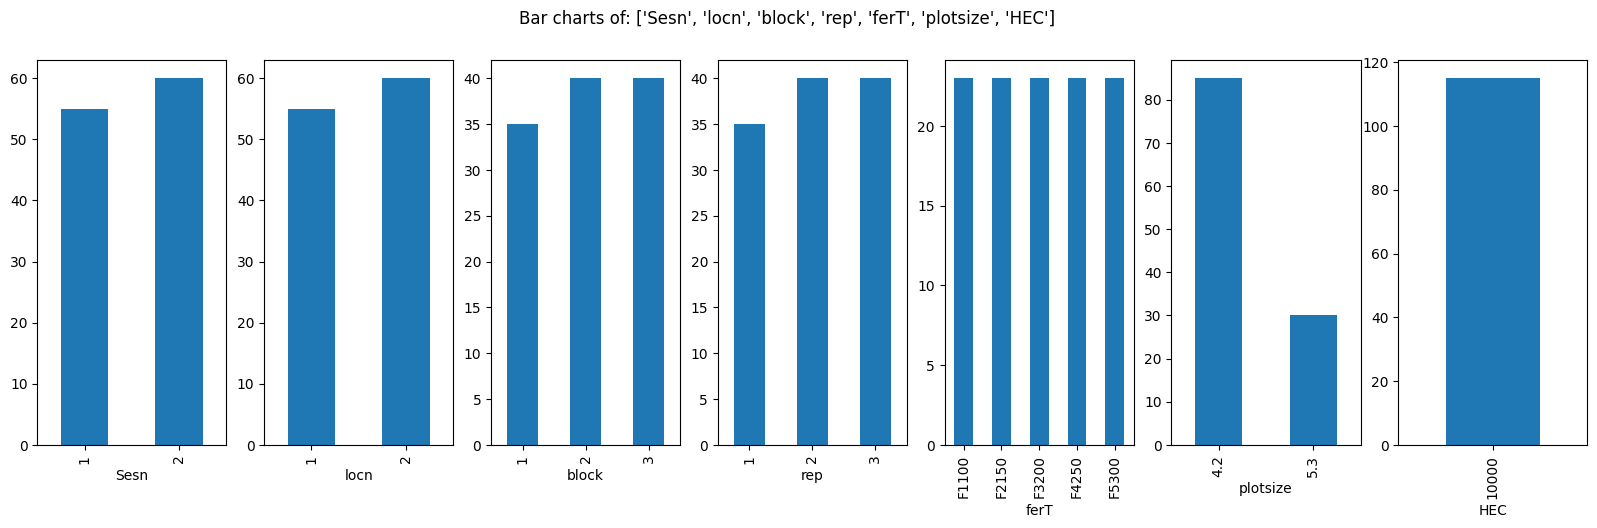

In [5]:
# Use the function for categorical variables in the Cassava dataframe
PlotBarCharts(inpData=Cassava, colsToPlot=['Sesn', 'locn', 'block', 'rep', 'ferT', 'plotsize', 'HEC'])

The categorical variables (Sesn, locn, bloack, rep, plotsize and HEC) do not appear normally distributed based on graphical presentation
Only ferT appears normally distributed

array([[<Axes: title={'center': 'Plants_harvested'}>,
        <Axes: title={'center': 'No_bigtubers'}>,
        <Axes: title={'center': 'No_mediumtubers'}>],
       [<Axes: title={'center': 'Weigh_bigtubers'}>,
        <Axes: title={'center': 'Weight_mediumtubers'}>,
        <Axes: title={'center': 'No_smalltubers'}>],
       [<Axes: title={'center': 'Weight_smalltubers'}>,
        <Axes: title={'center': 'Totaltuberno'}>,
        <Axes: title={'center': 'AV_tubers_Plant'}>],
       [<Axes: title={'center': 'TotalWeightperhectare'}>,
        <Axes: title={'center': 'TotalTuberperHectare'}>, <Axes: >]],
      dtype=object)

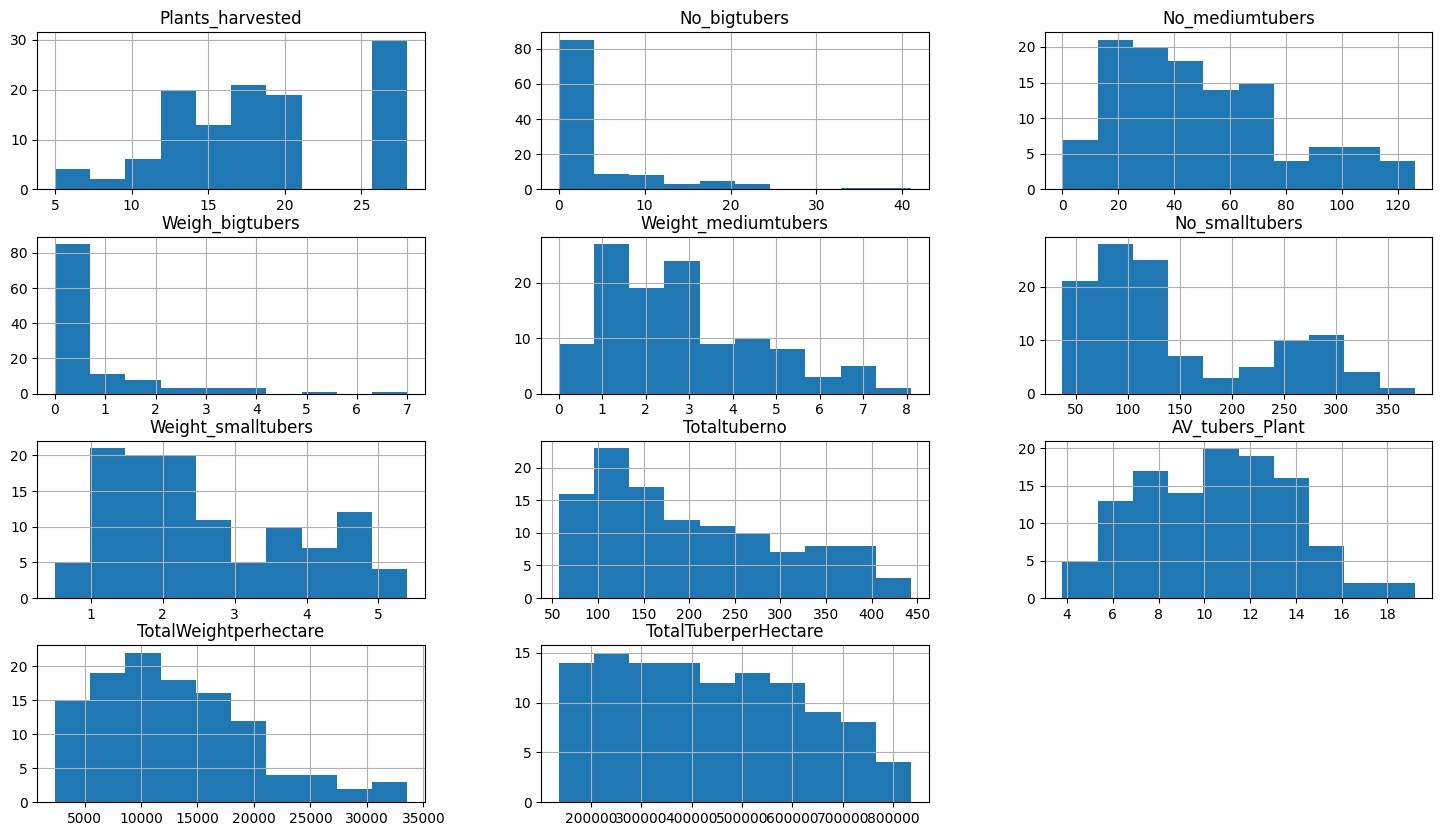

In [6]:
# Plot histograms of multiple continuous variables
Cassava.hist(['Plants_harvested', 'No_bigtubers', 'No_mediumtubers', 'Weigh_bigtubers',
              'Weight_mediumtubers','No_smalltubers','Weight_smalltubers',
              'Totaltuberno','AV_tubers_Plant','TotalWeightperhectare',
              'TotalTuberperHectare'], figsize=(18,10))

All of the continuous variables are not normally distributed. Only "AV_tubers_Plant" and "TotalTuberperHectare" appear normally distributed according to the histograms but this has to be confirmed

IndexError: index 8 is out of bounds for axis 0 with size 8

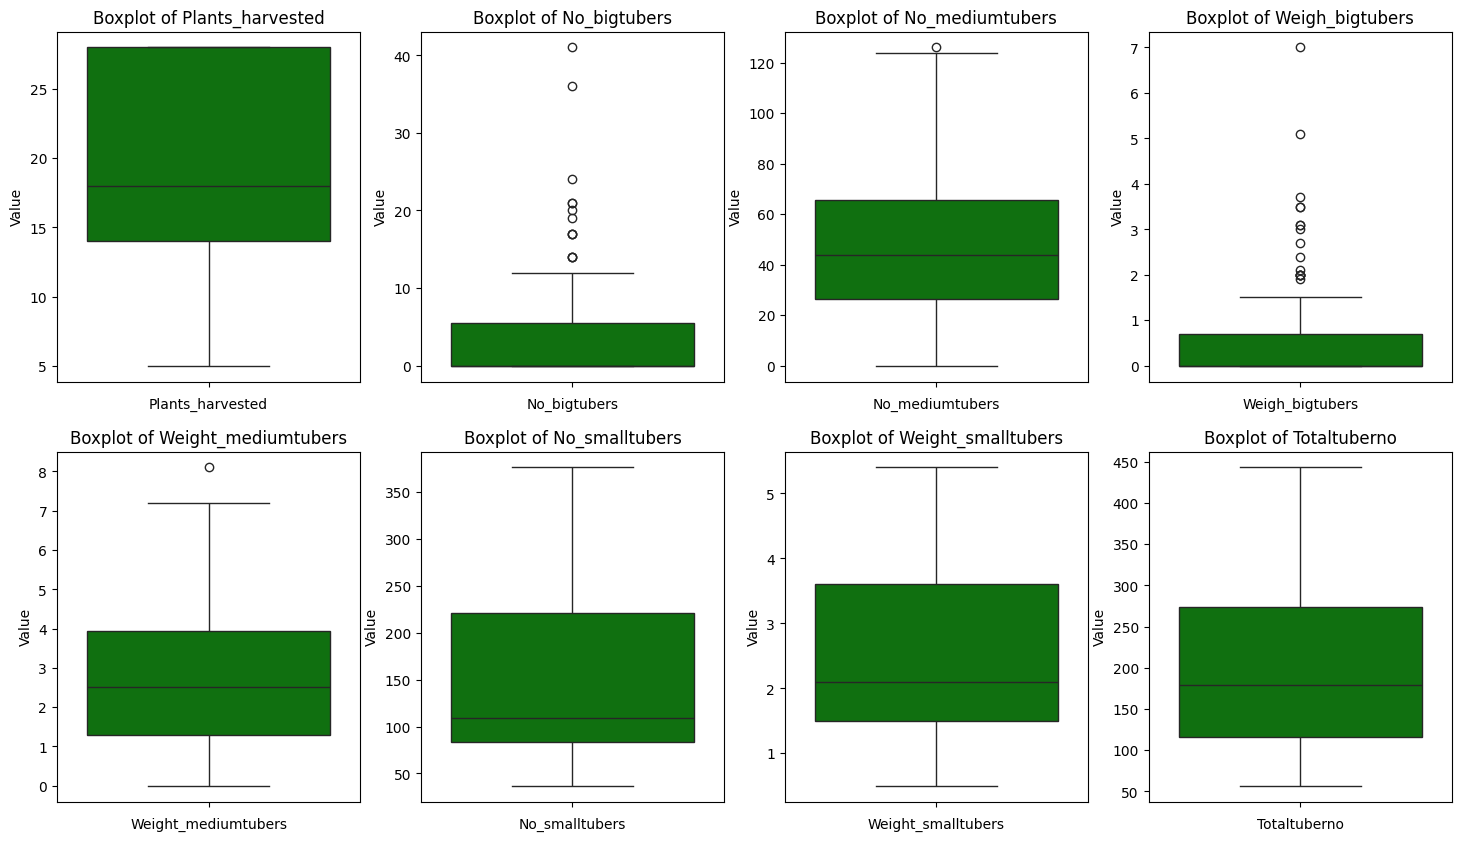

In [4]:
#Alternatively use boxplots
# Create a list of continuous variable columns
import matplotlib.pyplot as plt
import seaborn as sns
cont_var = ['Plants_harvested', 'No_bigtubers', 'No_mediumtubers', 'Weigh_bigtubers',
              'Weight_mediumtubers','No_smalltubers','Weight_smalltubers',
              'Totaltuberno','AV_tubers_Plant','TotalWeightperhectare',
              'TotalTuberperHectare']

# Creating a 2x4 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

# Flattenning the axes array for easier iteration
axes = axes.flatten()

# Iterating over the continuous variable columns to plot box plots on subplots
for i, column in enumerate(cont_var):
    sns.boxplot(data=Cassava[column], color="green", ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Boxplot of {column}')

# Adjusting the layout and spacing between subplots
plt.tight_layout()

# Show the box plot
plt.show()

In [40]:
# Confirm using the K-S test for normal distribution as to whether Av_tubers_Plant is normally distributed
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
stat, p = shapiro(Cassava['AV_tubers_Plant'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.986, p=0.265
Sample looks Gaussian (fail to reject H0)


In [41]:
# Confirm using the K-S test for normal distribution as to whether "TotalTuberperHectare" is normally distributed
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
stat, p = shapiro(Cassava['TotalTuberperHectare'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.962, p=0.002
Sample does not look Gaussian (reject H0)


In [9]:
#Alternatively
from scipy.stats import shapiro

# Specify the columns for which you want to perform the Shapiro-Wilk test
columns_to_test = ['Plants_harvested', 'No_bigtubers', 'Weigh_bigtubers', 'No_mediumtubers', 'Weight_mediumtubers', 'No_smalltubers', 'Weight_smalltubers', 'Totaltuberno', 'AV_tubers_Plant', 'Total_tubweight', 'TotalWeightperhectare', 'TotalTuberperHectare']

# Loop through each column
for column in columns_to_test:
    # Extract the column data
    data = Cassava[column]
    
    # Perform Shapiro-Wilk test
    stat, p = shapiro(data)
    
    # Printing the test statistics and p-value
    print(f"Column: {column}")
    print("Test statistic:", stat)
    print("p-value:", p)
    
    # Check the result
    alpha = 0.05
    if p > alpha:
        print("Data is normally distributed")
    else:
        print("Data is not normally distributed")
    
    print()  # Add a line break between results of different columns

Column: Plants_harvested
Test statistic: 0.8970928192138672
p-value: 2.2706333879796148e-07
Data is not normally distributed

Column: No_bigtubers
Test statistic: 0.6160324811935425
p-value: 6.856508303083723e-16
Data is not normally distributed

Column: Weigh_bigtubers
Test statistic: 0.5986296534538269
p-value: 3.0551999304451823e-16
Data is not normally distributed

Column: No_mediumtubers
Test statistic: 0.9460128545761108
p-value: 0.0001574022026034072
Data is not normally distributed

Column: Weight_mediumtubers
Test statistic: 0.9368536472320557
p-value: 3.8573787605855614e-05
Data is not normally distributed

Column: No_smalltubers
Test statistic: 0.8730066418647766
p-value: 1.7454715006692822e-08
Data is not normally distributed

Column: Weight_smalltubers
Test statistic: 0.9196906685829163
p-value: 3.5524035411071964e-06
Data is not normally distributed

Column: Totaltuberno
Test statistic: 0.9353274703025818
p-value: 3.081576505792327e-05
Data is not normally distributed

Co

If the p-value ≤ 0.05, then we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian.

If the p-value > 0.05, then we fail to reject the null hypothesis i.e. we assume the distribution of our variable is normal/gaussian.

According to the Shapiro-Wilk test, only AV_tubers_Plant is normally distributed

In [6]:
#TReat for outliers in the Cassava dataframe using the IQR method
# Define the factor to multiply by the IQR to determine the outlier threshold
iqr_factor = 1.5

# Define the columns in which you want to remove outliers
columns_to_clean = ['Plants_harvested', 'No_bigtubers', 'Weigh_bigtubers', 'No_mediumtubers', 'Weight_mediumtubers', 'No_smalltubers', 'Weight_smalltubers', 'Totaltuberno', 'AV_tubers_Plant', 'Total_tubweight', 'TotalWeightperhectare', 'TotalTuberperHectare']

# Create a new DataFrame for the cleaned data
Cassava_cleaned = Cassava.copy()

# Loop through each column
for column in columns_to_clean:
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = Cassava_cleaned[column].quantile(0.25)
    Q3 = Cassava_cleaned[column].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - iqr_factor * IQR
    upper_bound = Q3 + iqr_factor * IQR
    
    # Identify outliers based on the bounds
    outliers = Cassava_cleaned[(Cassava_cleaned[column] < lower_bound) | (Cassava_cleaned[column] > upper_bound)]
    
    # Remove the outliers from the DataFrame
    Cassava_cleaned = Cassava_cleaned.drop(outliers.index)

# Optional: Reset the index of the DataFrame
Cassava_cleaned = Cassava_cleaned.reset_index(drop=True)


In [7]:
#Checking cleaned shape (rows and columns) of cleaned data shape
Cassava_cleaned.shape

(87, 20)

IndexError: index 8 is out of bounds for axis 0 with size 8

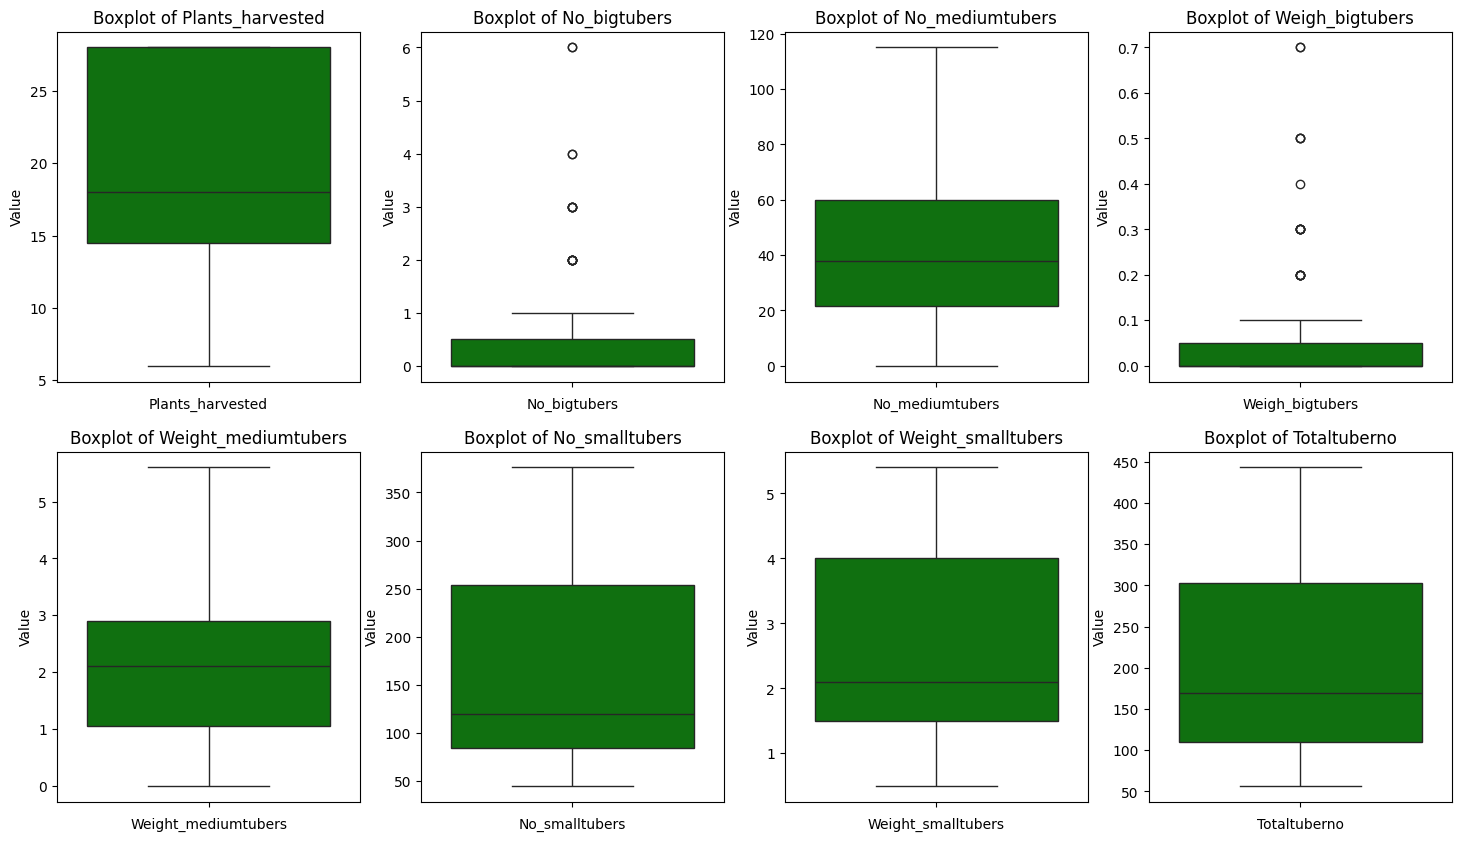

In [17]:
#Checking the distribution after outlier treatment
cont_var = ['Plants_harvested', 'No_bigtubers', 'No_mediumtubers', 'Weigh_bigtubers',
              'Weight_mediumtubers','No_smalltubers','Weight_smalltubers',
              'Totaltuberno','AV_tubers_Plant','TotalWeightperhectare',
              'TotalTuberperHectare']

# Creating a 2x4 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

# Flattenning the axes array for easier iteration
axes = axes.flatten()

# Iterating over the continuous variable columns to plot box plots on subplots
for i, column in enumerate(cont_var):
    sns.boxplot(data=Cassava_cleaned[column], color="green", ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Boxplot of {column}')

# Adjusting the layout and spacing between subplots
plt.tight_layout()

# Show the box plot
plt.show()


**<span style="color:purple">Final Result: The transformed dataset has 87 observations and 20 variables</span>**

**2. Investigate the relationships between the following variables using displays (graphs) and statistical tests  [5 MARKS]**


**a.      Two continuous variables**

<Axes: xlabel='AV_tubers_Plant', ylabel='TotalTuberperHectare'>

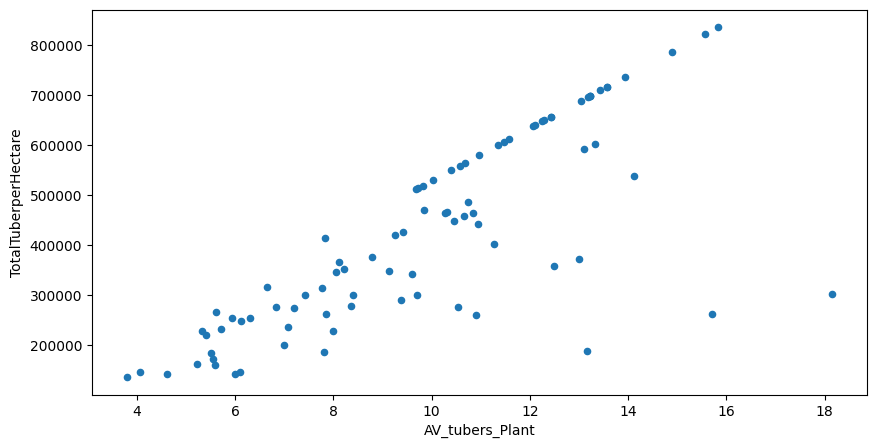

In [18]:
#Relationship between two continuous variables ("AV_tubers_Plant" and "Total_TuberperHectare")

%matplotlib inline
Cassava_cleaned.plot.scatter(x='AV_tubers_Plant', y='TotalTuberperHectare', marker='o', figsize=(10,5))

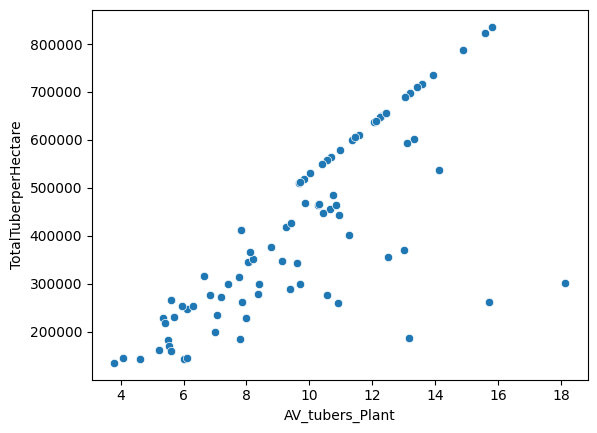

In [19]:
#Alternatively use seaborn
import seaborn as sns
sns.scatterplot(x="AV_tubers_Plant", y="TotalTuberperHectare", data=Cassava_cleaned);

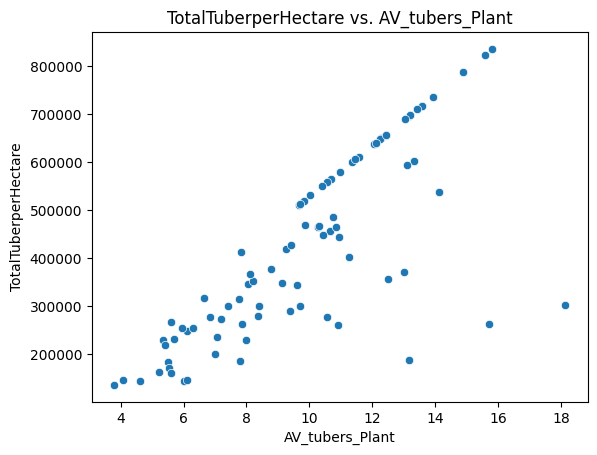

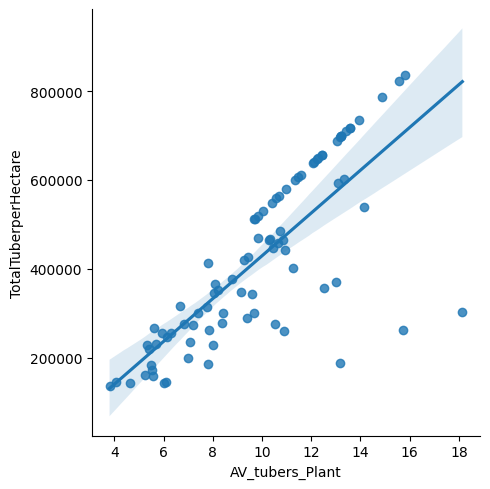

In [20]:
#Add labels to the scatterplot
ax = sns.scatterplot(x="AV_tubers_Plant", y="TotalTuberperHectare", data=Cassava_cleaned)
ax.set_title("TotalTuberperHectare vs. AV_tubers_Plant")
ax.set_xlabel("AV_tubers_Plant")

#Add a line of bestfit
sns.lmplot(x="AV_tubers_Plant", y="TotalTuberperHectare", data=Cassava_cleaned)

In [21]:
#Testing the statistical relationship using correlation
# Calculating correlation matrix
ContinuousVariables=['TotalTuberperHectare','AV_tubers_Plant']

# Creating the correlation matrix
CorrelationData=Cassava_cleaned[ContinuousVariables].corr()
CorrelationData

,TotalTuberperHectare,AV_tubers_Plant
TotalTuberperHectare,1.000000,0.776729
AV_tubers_Plant,0.776729,1.000000


In [23]:
#Alternatively run a Pearson correlation test
from scipy import stats
stats.pearsonr(Cassava_cleaned['TotalTuberperHectare'], Cassava_cleaned['AV_tubers_Plant'])

PearsonRResult(statistic=0.7767292333868071, pvalue=9.478003950996592e-19)

The graph shows a positive correlation between the two chosen continuous variables.

The statistical test generates a correlation value of 77.6% which is high and statistically significant with a p-value < 0.05

**b.      One continuous variable and one categorical variable**

<Axes: title={'center': 'AV_tubers_Plant'}, xlabel='Sesn'>

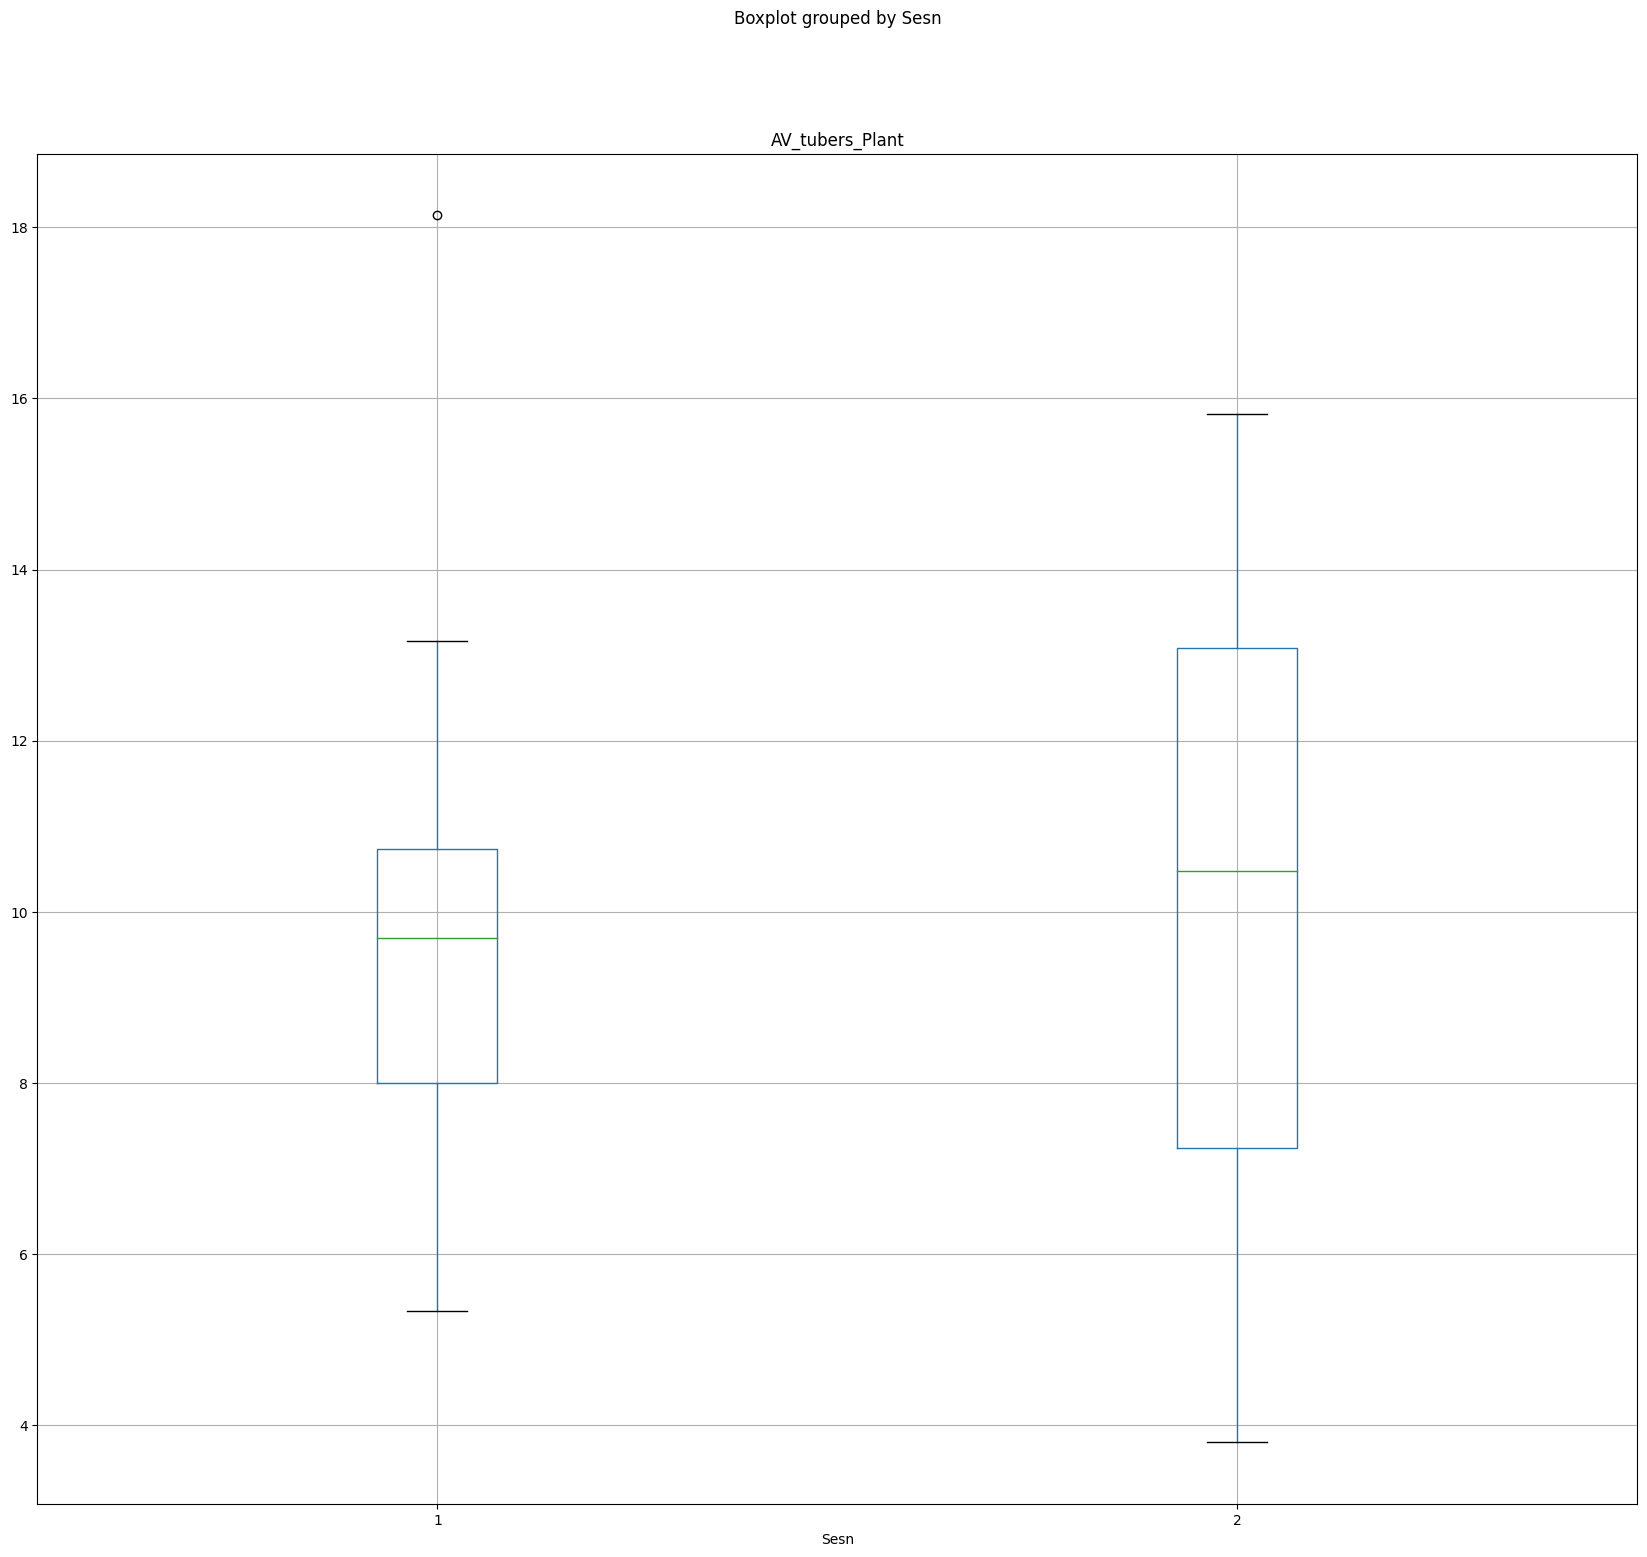

In [24]:
#Relationship between a categorical and continuous variable ("Sesn" and "AV_tubers_Plant")
#Generate a boxplot between the two variables
Cassava_cleaned.boxplot(column='AV_tubers_Plant', by='Sesn', figsize=(20,18))

There seems to be more average tubers per cassava plant in season 1 than in season 2.

Let's check this statistically using ANOVA

In [25]:
#Running an ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('AV_tubers_Plant ~ Sesn', data=Cassava_cleaned).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Sesn,4.783185,1.0,0.488993,0.486286
Residual,831.444069,85.0,NaN,NaN


The above code produces an F-value of (0.489), and a p-value = 0.48

if p < 0.05, this means that the categorical variable has significant influence on the continuous variable

if p > 0.05, this means that the categorical variable has no significant influence on the continuous variable

Therefore, at p=0.48, Sesn (season) has no influence on the average tubers per cassava plant

**c.       Two categorical variables**

In [30]:
#Generate a cross-tabulation between 'ferT' and 'Sesn'
CrosstabResult=pd.crosstab(index=Cassava_cleaned['ferT'],columns=Cassava_cleaned['Sesn'])
print(CrosstabResult)

Sesn   1   2
ferT        
F1100  9  12
F2150  9  11
F3200  3  12
F4250  4  12
F5300  4  11


<Axes: xlabel='ferT'>

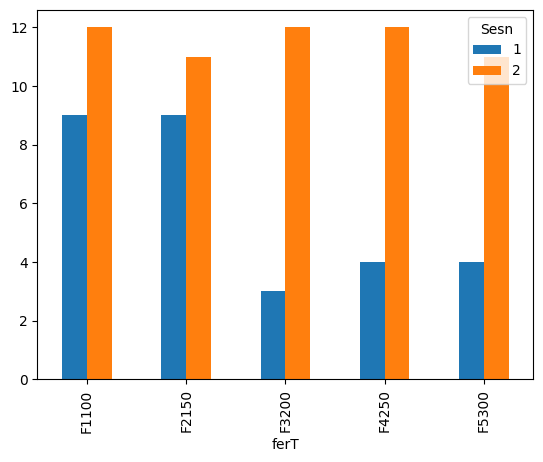

In [31]:
#Generate a barplot to depict the relationship between fertilizer and season
import matplotlib
%matplotlib inline
CrosstabResult.plot.bar()

In [27]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [29]:
#Use the function to calculate chisquare
CategoricalVariables=['ferT']

# Calling the function
FunctionChisq(inpData=Cassava_cleaned, 
              TargetVariable='Sesn',
              CategoricalVariablesList= CategoricalVariables)

ferT is NOT correlated with Sesn | P-Value: 0.39500315307760103


[]

The graph shows a higher usage of all five fertilizers during the second season

Chi-square tests rely on two hypotheses

H₀ (Null Hypothesis) — that the 2 categorical variables being compared are independent of each other. (p > 0.05)

H₁ (Alternate Hypothesis) — that the 2 categorical variables being compared are dependent on each other. (p < 0.05)

Therefore, season and fertilizer are independent, or not correlated, and the increases in fertilizer usage in season 2 are not as a result of the season.

**3. Cassava farmers in Soroti would like to know the following aspects to help inform their farming practices;**

**a. Does fertilizer application affect the projected “TotalWeightperhectare” and the "TotalTuberperHectare" (5 MARKS)**

In [16]:
# First subset the data to only deal with information in location 1 = Soroti
Soroti = Cassava_cleaned[(Cassava_cleaned["locn"] == 1)]



<Axes: title={'center': 'TotalWeightperhectare'}, xlabel='ferT'>

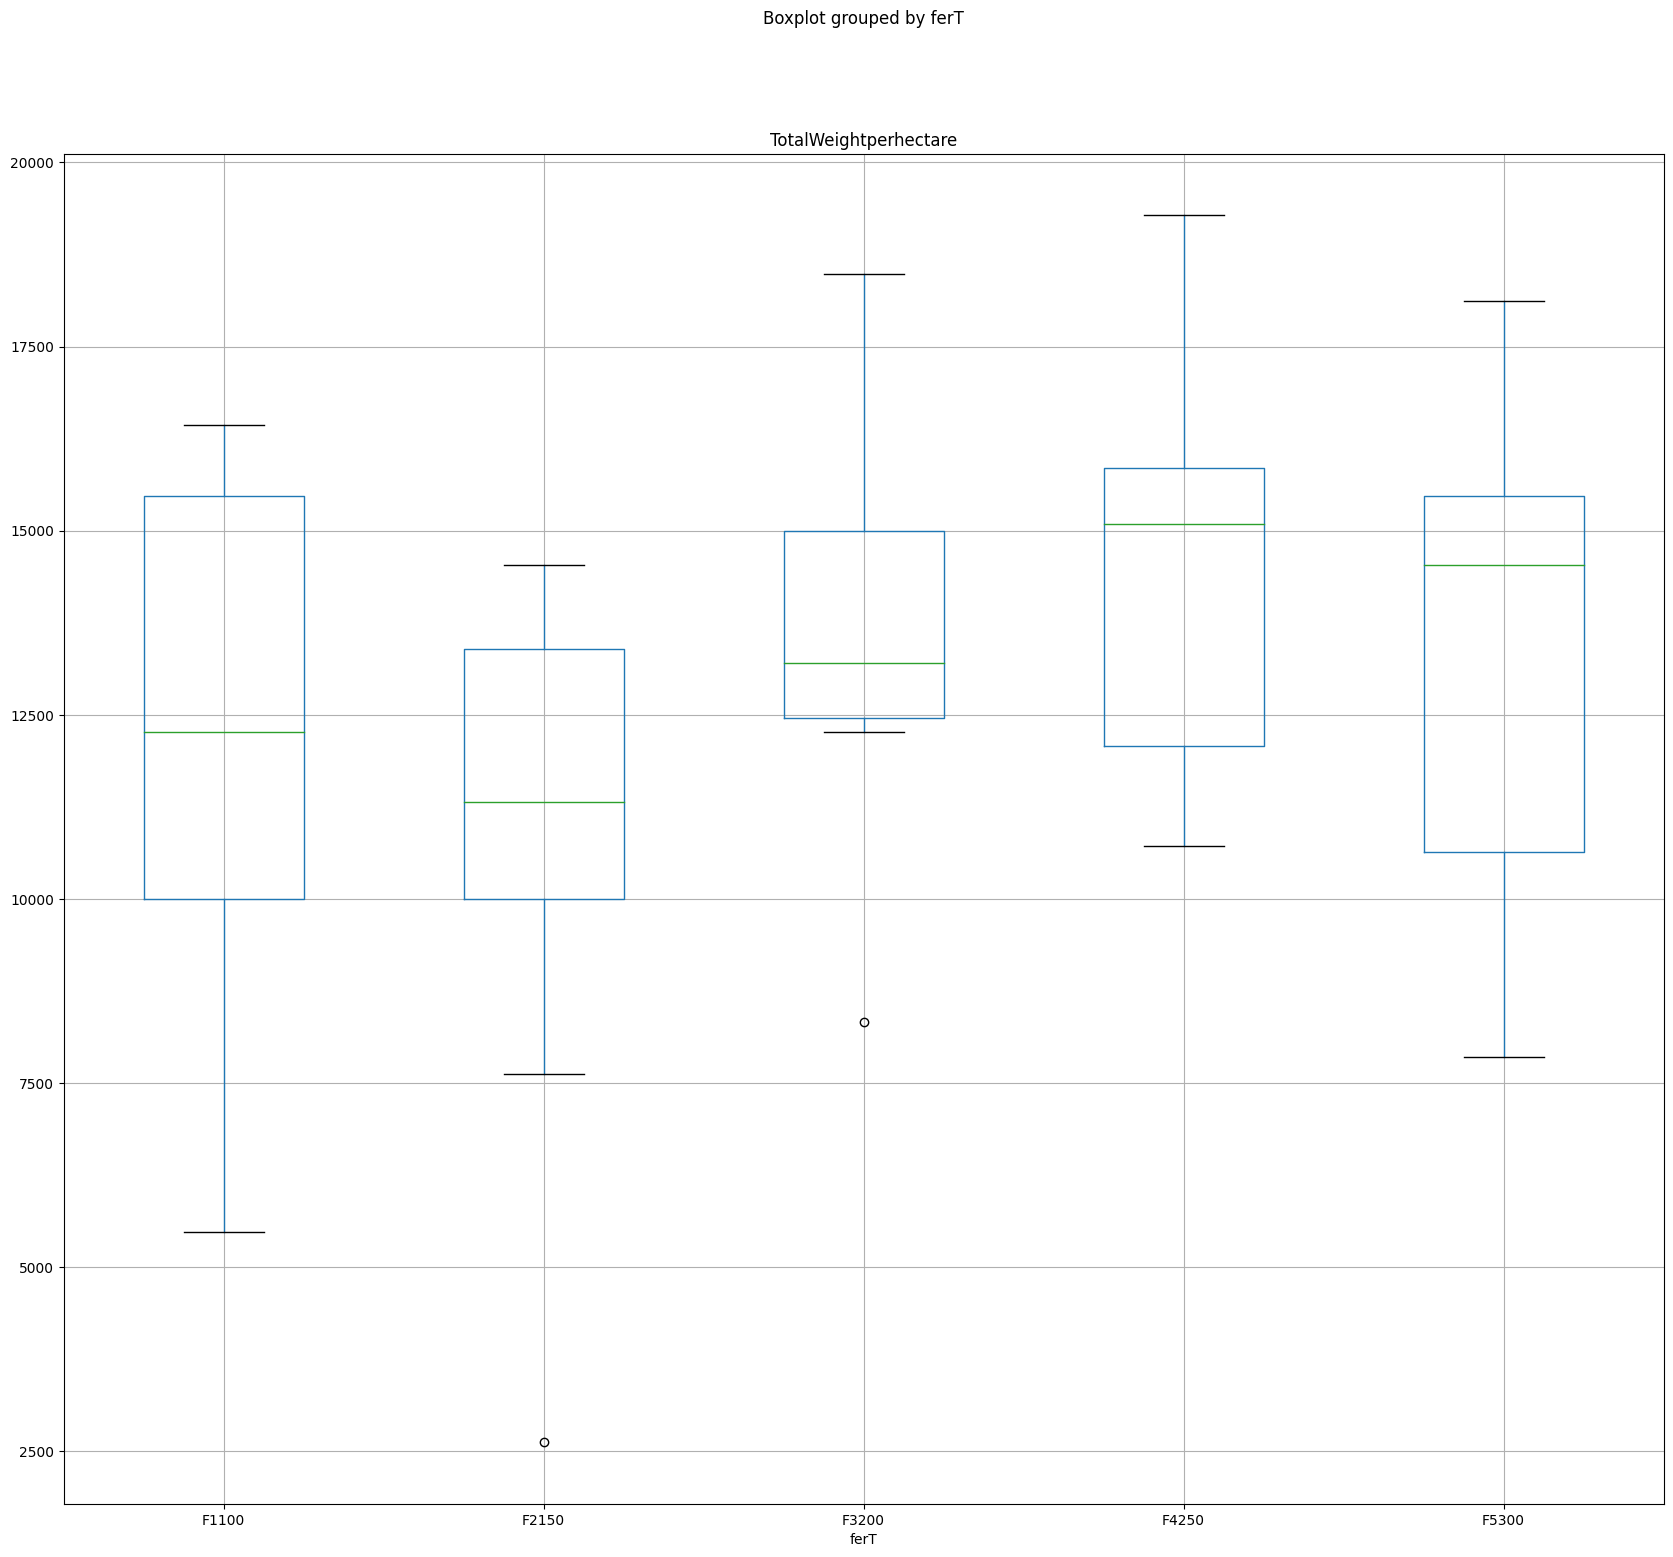

In [33]:
#Relationship between fertiliser and TotalWeightperhectare”
#Generate a boxplot between the two variables
Soroti.boxplot(column='TotalWeightperhectare', by='ferT', figsize=(20,18))

In [34]:
#Running an ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('TotalWeightperhectare ~ ferT', data=Soroti).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
ferT,7.311860e+07,4.0,1.535547,0.212036
Residual,4.404601e+08,37.0,NaN,NaN


Based on the visual display, ferT (F4250) consisting of Phosphorus generates the highest total weight per hectare in Soroti. ferT (F2150) consisting of NPK 15:15:15 produced the lowest weights of cassava tubers.

However, the ANOVA analysis, (F = 1.535, p-value = 0.212) showw that fertilizer does not significantly affect the total weight per hectare.

<Axes: title={'center': 'TotalTuberperHectare'}, xlabel='ferT'>

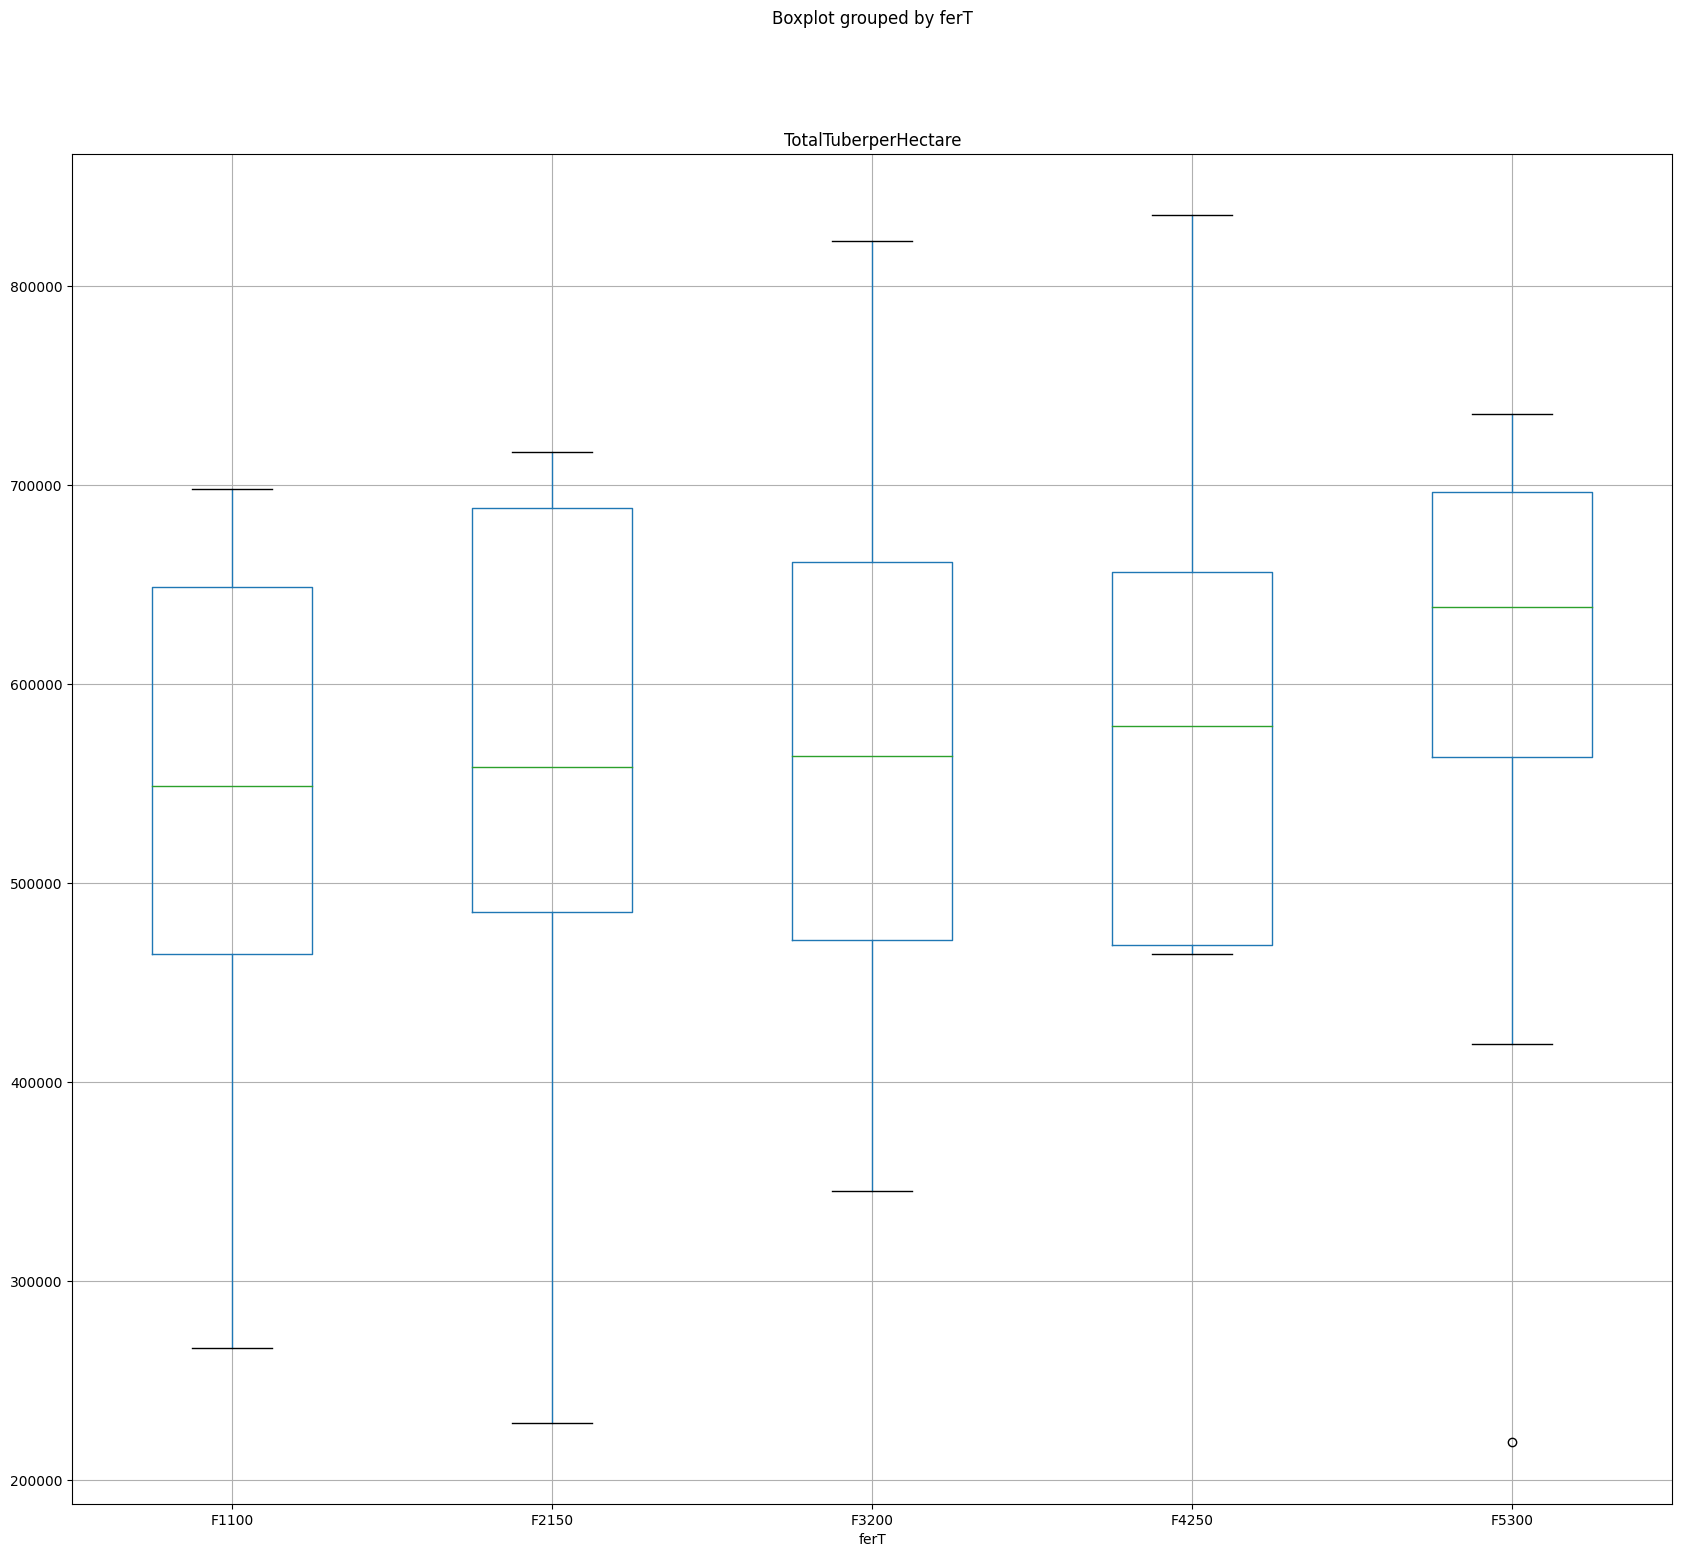

In [35]:
#Relationship between fertiliser and "TotalTuberperHectare"
#Generate a boxplot between the two variables
Soroti.boxplot(column='TotalTuberperHectare', by='ferT', figsize=(20,18))

In [36]:
#Running an ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('TotalTuberperHectare ~ ferT', data=Soroti).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
ferT,1.837100e+10,4.0,0.183376,0.94558
Residual,9.266870e+11,37.0,NaN,NaN


Fertilizer does not significantly affect the projected TotalTuberperHectare 

**b. Does the tillage method (“conv” and “minimum”) affect the projected “TotalWeightperhectare” and "TotalTuberperHectare" (5 MARKS)**

<Axes: title={'center': 'TotalWeightperhectare'}, xlabel='tillage '>

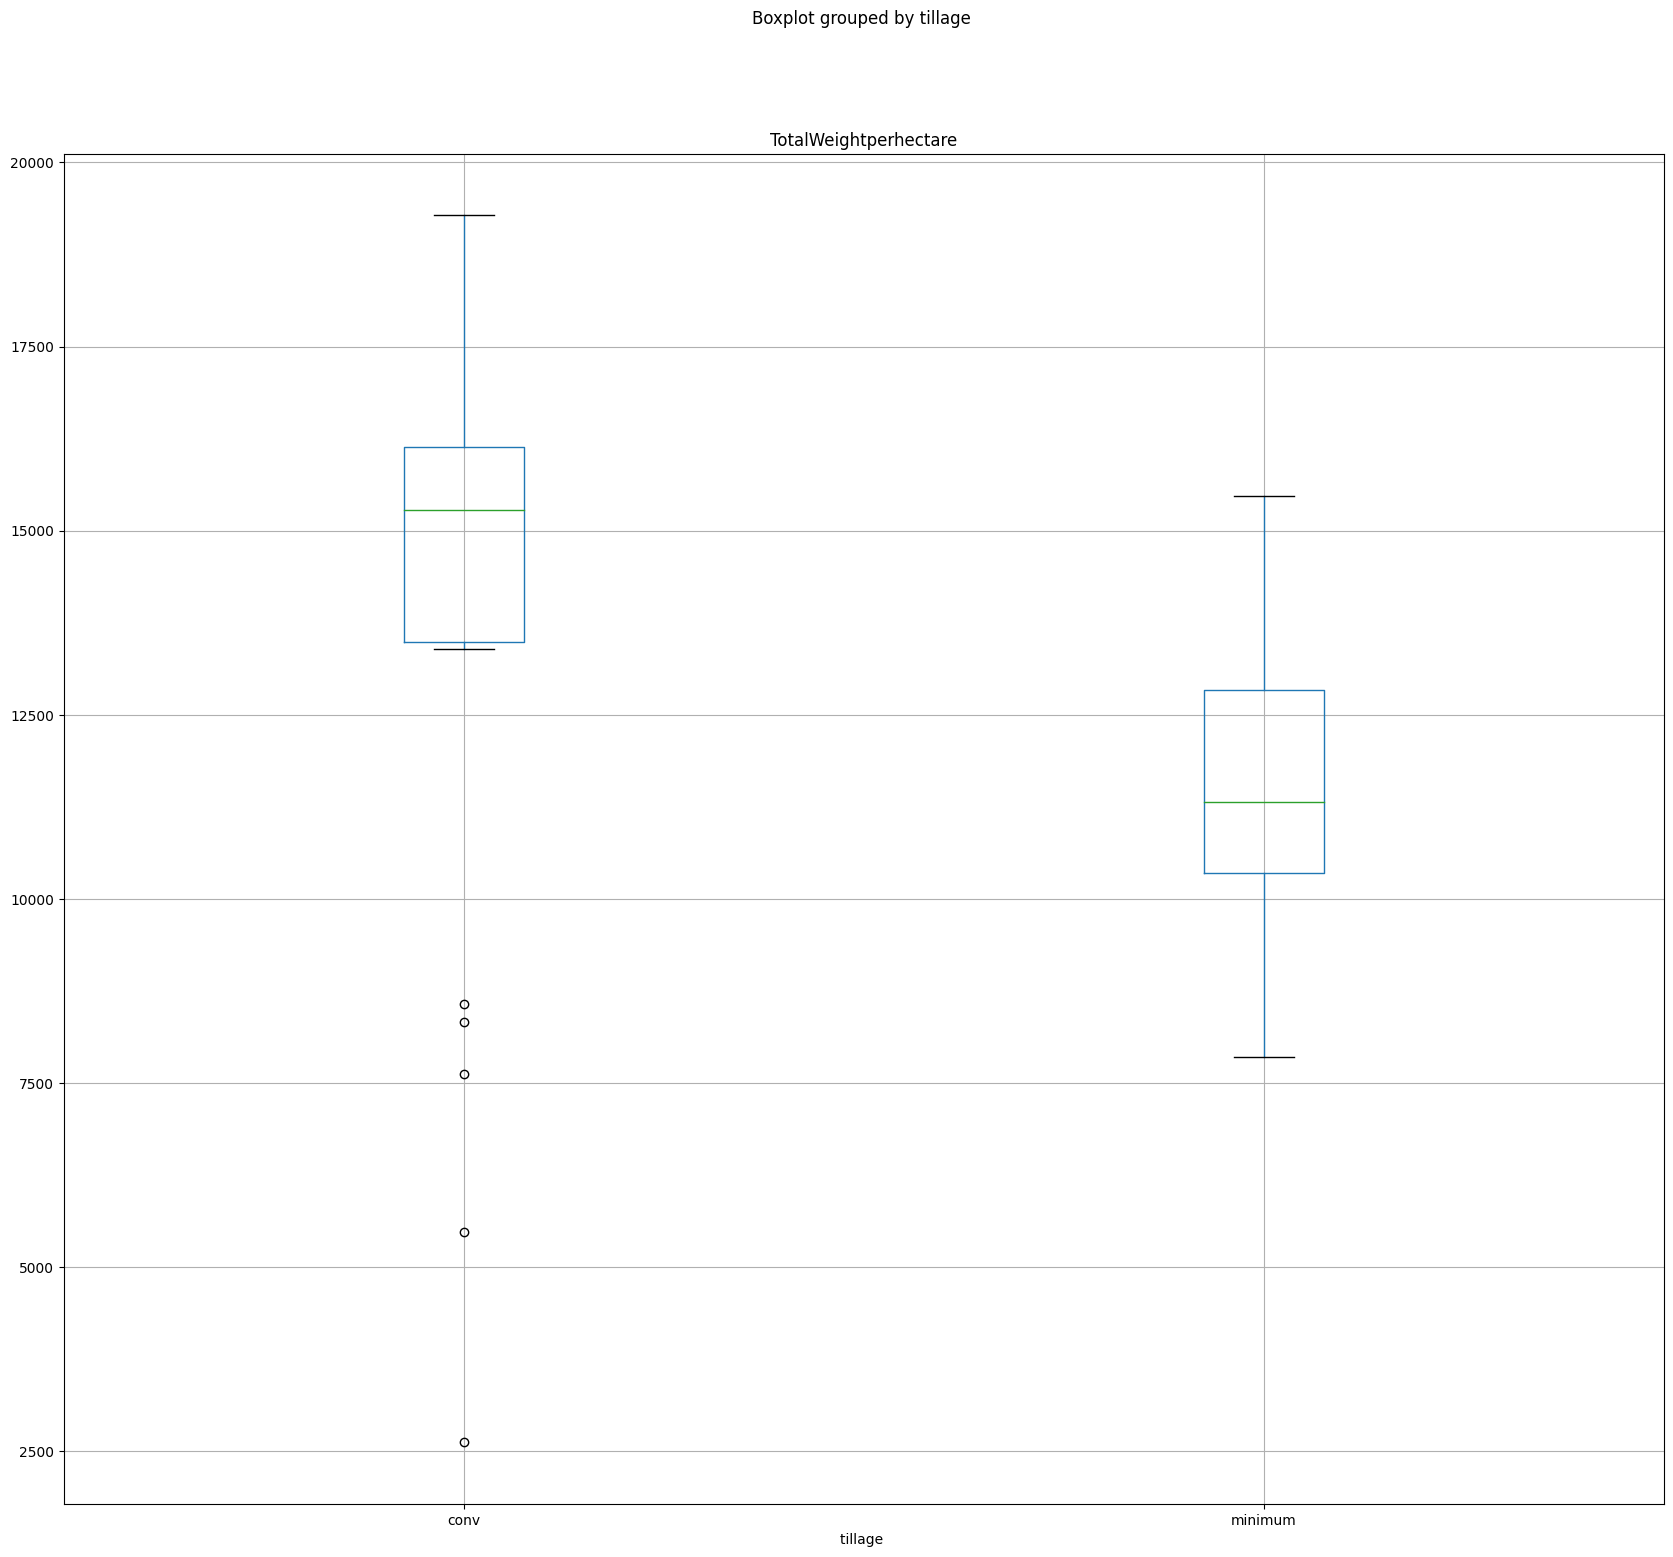

In [39]:
#Does tillage affect TotalWeightperhectare?
#Generate a boxplot between the two variables
Soroti.boxplot(column='TotalWeightperhectare', by='tillage ', figsize=(20,18))


#Then run an ANOVA

In [21]:
from scipy import stats
from scipy.stats import f_oneway

In [ ]:
# Define the variables
tillage_methods = ['conv', 'minimum']
tillage_column = 'tillage '  
weight_column = 'TotalWeightperhectare'
tuber_column = 'TotalTuberperHectare'

if tillage_column in Soroti.columns and weight_column in Soroti.columns and tuber_column in df.columns:
    df_filtered = Soroti[Soroti[tillage_column].isin(tillage_methods)]

    if df_filtered.empty:
        print(f"No data available for tillage methods: {tillage_methods}")
    else:
        # Plot the effect of Tillage Method on Total Weight per Hectare
        df_filtered.boxplot(column=weight_column, by=tillage_column, grid=False)
        plt.xlabel(tillage_column.strip())  # Remove the extra space for the label
        plt.ylabel(weight_column)
        plt.title(f'Effect of {tillage_column.strip()} on {weight_column}')
        plt.suptitle('')  
        plt.show()

        # Plot the effect of Tillage Method on Total Tuber per Hectare
        df_filtered.boxplot(column=tuber_column, by=tillage_column, grid=False)
        plt.xlabel(tillage_column.strip())  # Remove the extra space for the label
        plt.ylabel(tuber_column)
        plt.title(f'Effect of {tillage_column.strip()} on {tuber_column}')
        plt.suptitle('')  
        plt.show()

        # Perform t-test for TotalWeightperhectare
        df_conv = df_filtered[df_filtered[tillage_column] == 'conv']
        df_minimum = df_filtered[df_filtered[tillage_column] == 'minimum']
        t_stat_weight, p_value_weight = ttest_ind(df_conv[weight_column], df_minimum[weight_column], nan_policy='omit')
        print(f'TotalWeightperhectare: t-statistic = {t_stat_weight}, p-value = {p_value_weight}')

        # Perform t-test for TotalTuberperhectare
        t_stat_tuber, p_value_tuber = ttest_ind(df_conv[tuber_column], df_minimum[tuber_column], nan_policy='omit')
        print(f'TotalTuberperhectare: t-statistic = {t_stat_tuber}, p-value = {p_value_tuber}')
else:
    print(f"Column '{tillage_column}', '{weight_column}', or '{tuber_column}' not found in the DataFrame")

The tillage method doesn't significantly affect the TotalWeighperHectare and TotalTuberperHectare for the two tillage methods (p-value < 0.05) in Soroti.